# IMDS Workshop 6
### *By Jeffrey Giansiracusa - Michaelmas 2023*


This worksheet covers the content of lectures:

    6.1 Spans
    6.2 Linear dependence
    6.3 Bases
    2.4 Matrices

Key points for you to learn:

* The span of a set of vectors. Lines, planes, etc.
* A set of vectors is **linearly independent** if you can't make any one as a linear combination of the others
* **Range** of a matrix = span of the columns
* The **rank** of a matrix = how many linearly independent columns you can find = dimension of the range (so a set of $n$ vectors are linearly independent if and only if they give a matrix of rank $n$.)
* **Basis** = linearly independent and spans
* Matrices and how to multiply them
* Linear systems in terms of vectors and matrices


# Initialization code to run before you start your work

Click on the cell below and then type Shift-Return to execute it.

In [1]:
import numpy as np
import math
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

from bokeh.io import output_notebook, show
from bokeh.plotting import figure
output_notebook()


# Input is a list of 2d vectors to be plotted.
def Plot2dVectors(list_of_endpoints):
    p = figure(width=600, height=600, title="Vectors!")
    for vect in list_of_endpoints:
        xcoords = [0, vect[0]]
        ycoords = [0, vect[1]]
        p.line(xcoords, ycoords, line_width=2)
        p.circle([vect[0]], [vect[1]], color='red', size=6)
    show(p)


def Plot2dDots(list_of_points):
    TOOLTIPS = [("(x,y)", "($x, $y)")]
    p = figure(width=600, height=600, title="Some points", tooltips=TOOLTIPS)
    D = np.array(list_of_points).T
    p.circle(D[0], D[1], color='blue', size=6)
    show(p)


# Input is a list of 3d vectors
def Plot3dVectors(list):

    ax = plt.axes(projection='3d')
    for vect in list:
        ax.plot([0, vect[0]], [0, vect[1]], [0, vect[2]], color='blue')
    ax.plot([0, 0], [-10, 10], 'g--')
    ax.plot([-10, 10], [0, 0], 'g--')
    plt.draw()
    plt.show()

Loading BokehJS ...

### If you have Holoviews and Plotly installed and working 
 
then you can use a nicer 3d plotter defined below.

In [2]:

import holoviews as hv
from holoviews import dim, opts
hv.extension('plotly')

def FancyPlot3dVectors(list):
    xcoords=[]
    ycoords=[]
    zcoords=[]
    colorlist=[]
    for vect in list:
        steps = np.mgrid[0:100]*0.01
        x = steps*vect[0]
        y = steps*vect[1]
        z = steps*vect[2]
        xcoords += [val for val in x]
        ycoords += [val for val in y]
        zcoords += [val for val in z]
        colorlist += [(1-val) for val in steps]
    xcoords = np.array(xcoords)
    ycoords = np.array(ycoords)
    zcoords = np.array(zcoords)
    return hv.Scatter3D((xcoords, ycoords, zcoords)).opts(cmap='fire', color=colorlist, size=5)


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

---

# Mathematical review

## Linear combinations

We can add vectors (assuming they live in the same space $\mathbb{R}^n)$, and we can make scalar multiples of vectors.  Combining these two operations gives us *linear combinations*.  Given some vectors $\vec{v}_1, \ldots, \vec{v}_k$ and numbers $c_1, \ldots, c_k$, we make the linear combination
$$c_1 \vec{v}_1 + \cdots + c_k \vec{v}_k$$ 
(multiply each vector by the corresponding number, and then add them up).

## Spans

The **span** of a set of vectors $\vec{v}_1, \ldots, \vec{v}_k$ is simpy the set of all things we can possibly make as linear combinations of these vectors. For example, the vectors
$$\vec{v}_1 = \begin{pmatrix}1 \\ 0\end{pmatrix}, \quad \vec{v}_2 = \begin{pmatrix}0 \\ 1\end{pmatrix}$$
have a span that is all of $\mathbb{R}^2$ because any vector $\begin{pmatrix}a \\ b\end{pmatrix}$ can be written as
$$
a\begin{pmatrix}1 \\ 0\end{pmatrix} + b\begin{pmatrix}0 \\ 1\end{pmatrix}
$$

## Subspaces and dimension

Inside $\mathbb{R}^n$, any set that we make by taking the span of a collection of vectors is a **linear subspace** (sometimes alternatively called a vector subspace or just a subspace).  For example, the span of 
$$\begin{pmatrix} 1 & 0 & 0\end{pmatrix}, \quad \text{ and } \begin{pmatrix} 0 & 1 & 0\end{pmatrix}$$
is the subspace consisting of the xy-plane.

The **dimension** of a linear subspace is the smallest number of vectors that can be used to span it.  


## Linear dependence

Given a set of vectors $\vec{v}_1, \ldots, \vec{v}_k$, the zero linear combination is always a way to make the zero vector:
$$
\begin{pmatrix} 0 \\ \vdots \\ 0 \end{pmatrix} = 0\vec{v}_1 + \cdots + 0\vec{v}_k.
$$
We say that a collection of vectors $\vec{v}_1, \ldots, \vec{v}_k$ is **linearly dependent** if there is another way to make the zero vector as a linear combination.  Such a linear combination is called a **linear dependence relation**.  An equivalent way to say this is that one of the vectors can be produced as a linear combination of the others.  

For example, the vectors $\begin{pmatrix} 1 \\ 0 \end{pmatrix}, \begin{pmatrix} 0 \\ 1 \end{pmatrix}, \begin{pmatrix} 2 \\ 2 \end{pmatrix}$ are linearly dependent because 
$$
2\begin{pmatrix} 1 \\ 0 \end{pmatrix} +  2\begin{pmatrix} 0 \\ 1 \end{pmatrix} = \begin{pmatrix} 2 \\ 2 \end{pmatrix}.
$$


If we can write one vector $\vec{v}_i$ as a linear combination of the others, then we can remove that one from the list and the span of the remaining vectors will be unchanged.

## Linearly independent vectors

A collection of vectors $\vec{v}_1, \ldots, \vec{v}_k$ is said to be **linearly independent** if they are not linearly dependent.

## Basis

A collection of vectors $\vec{v}_1, \ldots, \vec{v}_k$ is said to be a **basis** if they are linearly independent and the span the whole space that they live in.

## Matrices

A matrix is a rectangular arrangement of numbers such as
$$
A=\begin{pmatrix} 4 & 8 & 5 & -1 \\ 1 & 2 & -3 & 5 \\ 0 & 1 & 0 & 3 \end{pmatrix}.
$$
We say that a matrix is $m \times n$ if it has $m$ rows and $n$ columns.  We'll sometimes write $A_{ij}$ for the number in row $i$ and column $j$.

The **rank** of a matrix is biggest number of linearly independent column vectors it has.  

### Matrix times vector

Given matrix $A$ of shape $m \times n$ and a vector $\vec{v}=(v_1, \ldots, v_n) \in \mathbb{R}^n$, the product $A\vec{v}$ is a vector in $\mathbb{R}^m$ given by making a linear combination of the columns of $A$ using the components $v_i$ as coefficients.  We take the scalar $v_i$ times the $i^{th}$ column of $A$, and then we sum these up for $i=1\ldots n$.

Note that $A\vec{v}$ is thus automatically a vector in the span of the columns of $A$.

The rank of a matrix is equal to the dimension of the span of the columns.

### Matrix times matrix

Given $A$ of shape $m \times n$ and $B$ of shape $n \times k$, the product matrix $AB$ has shape $m \times k$.  The entry in row i and column j is the dot product of the $i^{th}$ row of $A$ with the $j^{th}$ column of $B$.


---
# Matrices in NumPy

NumPy doesn't just do vectors.  It also lets us work very conveniently with matrices.  

## Creating matrices

To make a matrix in NumPy, we start with the rows as lists, and then put them all together as a list of lists.  Then we give this to np.array to get our matrix.



In [3]:
# Example - try this code.

row1 = [1,3,5]
row2 = [2,4,6]
list_of_rows = [row1, row2]

our_matrix = np.array(list_of_rows)

our_matrix


array([[1, 3, 5],
       [2, 4, 6]])

### Now a warm-up mini exercise

Can you create the following matrices in NumPy?
$$A=\begin{pmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1\end{pmatrix} \quad B=\begin{pmatrix} 2& 5& 19& 7\\ 1& 1& -1 &\end{pmatrix}
\quad C =\begin{pmatrix} 1 & 0  \\ 0 & 1 \\ 2 & 3 \\ 4 & 5\end{pmatrix}$$


In [4]:
# Create your matrices here.
import numpy as np

# Creating matrix A as a 3x3 identity matrix
A = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])

# Creating matrix B as a 2x4 matrix
B = np.array([[2, 5, 19, 7], [1, 1, -1, 0]])

# Creating matrix C as a 4x2 matrix
C = np.array([[1, 0], [0, 1], [2, 3], [4, 5]])

In [ ]:
A

In [ ]:
B

In [ ]:
C

## Transpose

The transpose of an m x n matrix $A$ is a matrix $A^T$ of shape n x m, where the rows of $A^T$ are equal to the columns of $A$, and vice versa.

In NumPy, you can get the transpose in several equivalent ways:
* A.T
* A.transpose()
* np.transpose(A)


## In NumPy, there are 3 types of vectors:  
1. **(ordinary) vectors** -  e.g., np.array([1,2,3])
2. **column vectors** - these are the same as n x 1 matrices, e.g., np.array([[1], [2], [3]]) 
3. **row vectors** - these are the same as 1 x n matrices, e.g., np.array([[1,2,3]])

## The @ operator does much more than just dot products.

1. (vector) @ (vector) = dot product

2. (matrix) @ (matrix) = matrix multiplication

3. (matrix) @ (column vector) = this is a special case of matrix multiplication 2.

4. (row vector) @ (column vector) = dot product (this is a special case of 2.)

5. (matrix) @ (vector) = same as (matrix) @ (column vector)


## Extracting pieces of matrices
We often have a situation where we need to take a matrix apart into pieces.  For instance, I might want to pull out the last column as a vector, or pull out the 2nd row as a vector.

Extracting rows is easy:
A[i] gives the $i^{th}$ row.

To extract a column, there a few options that will all work.  You can transpose the matrix and then extract a column of the transpose, like this:

**A.T[2]**  gives the 3rd column (because the columns in Python are numbered 0,1,2,...)

Or you can use *slicing* in Python:

**A[:,2]**

And if you want the entry in row i and column j, then you simply type **A[i,j]**.



---
### Exercise 1

**A.** Consider the vectors  $$\vec{u}_1=\begin{pmatrix}1 \\ 0\end{pmatrix} \text{ and } \vec{u}_2=\begin{pmatrix}0 \\ 1\end{pmatrix}.$$
  1. Recall that a linear combination means walking some disance along the $\vec{u}_1$ direction and then some distance along the $\vec{u}_2$ direction.  Experiment and make some linear combinations of these vectors. Can you get to the points $(4,9)$ and $(2,-3)$?
  2. How much of the plane can you get to?  Are the any points that you cannot get to?
  3. Do these vectors span $\mathbb{R}^2$? Are they linearly independent?  Are they a basis?

**B.** Now consider the vectors 
$$\vec{v}_1=\begin{pmatrix}1 \\ 2\end{pmatrix} \text{ and } \vec{v}_2=\begin{pmatrix}3 \\ 6\end{pmatrix}.$$
  1. Make some linear combinations of these vectors. How much of the plane can you get to?  
  2. The trivial linear combination $0\vec{v_1} + 0\vec{v_2}$ always gives the zero vector.  Can you find another way to make the zero vector as a linear combination?
  3. Do these vectors span $\mathbb{R}^2$? Are they linearly independent?  Are they a basis?

**C.** Next consider the vectors
$$ \vec{w}_1 =\begin{pmatrix} 1 \\ 0\end{pmatrix} \text{ and } \vec{w}_2=\begin{pmatrix} 1 \\ -1\end{pmatrix}.$$
  1. Make some linear combinations of these vectors. How much of the plane can you get to?  
  2. Can you find a linear combination $\lambda\vec{w}_1 + \mu \vec{w}_2$ that makes $\begin{pmatrix} 5 \\ 6\end{pmatrix}$?
  3. Do these vectors span $\mathbb{R}^2$? Are they linearly independent?  Are they a basis?

**D.** Finally, it's time for 3d.  Consider the vectors
$$\vec{z}_1=\begin{pmatrix}1 \\ 2 \\ 0 \end{pmatrix} \quad 
  \vec{z}_2=\begin{pmatrix}2 \\ 4 \\ 1 \end{pmatrix} $$
  1. Can you make a linear combination that is $\begin{pmatrix} 3 \\ 6 \\ 1\end{pmatrix}$?  What about
 $\begin{pmatrix} 4 \\ 8 \\ 7\end{pmatrix}$?  What about  $\begin{pmatrix} 3 \\ 5 \\ 3\end{pmatrix}$?
  2. How much of $\mathbb{R}^3$ can you get to by making linear combinations of $\vec{z}_1$ and $\vec{z_2}$?  What is the span?
  3. Is the span any larger if we add the vector $\vec{z}_3=\begin{pmatrix} 0 \\ 0 \\ -1\end{pmatrix}$ and take the span of the 3 vectors $\{\vec{z}_1,\vec{z}_2,\vec{z}_3\}$?


**You can write some code below or do this one on paper if you prefer.**


In [5]:
# code for part A
# You will have to fill in the blanks marked by ???

u1 = np.array([1, 0])
u2 = np.array([0, 1])

lincomb1 = 4*u1 + 9*u2
lincomb2 = 2*u1 + (-3)*u2
# etc

Plot2dVectors([lincomb1, lincomb2])

In [6]:
# First, we need to import the necessary libraries for plotting
import matplotlib.pyplot as plt

# Define the vectors v1 and v2
v1 = np.array([1, 2])
v2 = np.array([3, 6])

# We can try different coefficients for linear combinations
# For instance, 2*v1 and -0.5*v2 should both lie on the same line as v1 and v2
lincomb1 = 2 * v1
lincomb2 = -0.5 * v2

# A function to plot vectors in 2D
# def Plot2dVectors(vectors, colors=None):
#     plt.figure(figsize=(8,8))
#     ax = plt.gca()
    
#     # Plotting each vector
#     for i, vec in enumerate(vectors):
#         color = 'k' if colors is None else colors[i]
#         ax.quiver(0, 0, vec[0], vec[1], angles='xy', scale_units='xy', scale=1, color=color)

#     # Setting the x-limits and y-limits
#     max_val = np.max(np.abs(vectors))
#     plt.xlim(-max_val, max_val)
#     plt.ylim(-max_val, max_val)
    
#     # Creating grid lines
#     plt.grid(True)
#     plt.axhline(y=0, color='k')
#     plt.axvline(x=0, color='k')

#     # Show the plot
#     plt.show()

# Now, let's plot the vectors
Plot2dVectors([v1, v2, lincomb1, lincomb2])


In [7]:
# code for part C

# Define the vectors w1 and w2
w1 = np.array([1, 0])
w2 = np.array([1, -1])

target_vector = 11*w1-6*w2
target_vector

array([5, 6])

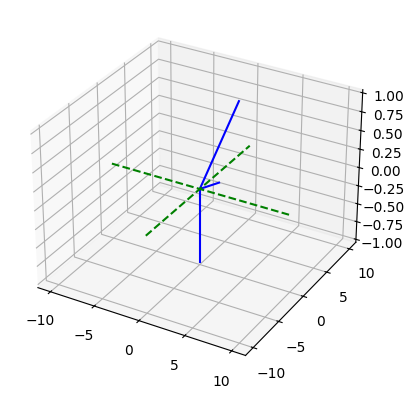

In [8]:
# code for part D
# True, True, False

# Define the vectors z1, z2, and z3
z1 = np.array([1, 2, 0])
z2 = np.array([2, 4, 1])
z3 = np.array([0, 0, -1])


Plot3dVectors([z1, z2, z3])

---
### Exercise 2

Suppose we are building a model for some process involving quantities $x$ and $y$. Let $x_n$ and $y_n$ denote their values after n time steps, and suppose we have looked at the process and arrived at the model
$$x_{n+1} = (0.94)x_n + (0.34)y_n$$
$$y_{n+1} = (−0.34)x_n + (0.94)y_n$$
What happens over time if we start with $x_0 = 10$ and $y_0 = 0$? 

* Calculate some points with the code below. 
* Then plot them.

You might find it useful to use matrix multiplication here.



In [ ]:
# In the code below, fill in the '?'s with appropriate numbers.

# Our initial vector v0 = [x0, y0]
v0 = np.array([??,??])

# The matrix
A = np.array([[??,??], [??,??]]) 

# Use matrix multiplication to calculate v1, v2, v3, etc.
v1 = ???

# To plot some points, you can use the function Plot2dDots that has been defined for you above. 
# It's basically the same as Plot2dVectors except that it just draws the endpoints and not the line from the origin out to the endpoint.
# For example
# Plot2dDots([[1,2], [1,3], [2,4]]
# will draw 3 small circles at positions [1,2], [1,3], and [2,4]



---

### Exercise 3

Multiplying a matrix $A$ times a vector $\vec{v}$ means we form a new vector by making a linear combination of the columns of $A$.  The coefficient of the $i^{th}$ column of $A$ in this linear combination is the $i^{th}$ component of $\vec{v}$.  Multiplying a matrix $A$ times a matrix $B$ means we compute the vector $A\vec{b}$ for each column $\vec{b}$ of $B$ and then these give the columns of the matrix $AB$.  Equivalently, the i,j entry of the product $AB$ is the dot product of the $i^{th}$ of $A$ with the $j^{th}$ column of $B$.

1. Calculate the product of matrices:
$$
  \begin{pmatrix}3 & 4 \\ 5 & 6\end{pmatrix} \begin{pmatrix}1 & 0 \\ -3 & 2\end{pmatrix}
$$
2. Calculate
$$
  \begin{pmatrix}1 & 0 & 0 \\ 0 & 2 & 0 \\ 0 & 0 & 3\end{pmatrix} \begin{pmatrix} 1 & 1 \\ 1 & 1 \\ 1 & 1\end{pmatrix}
$$
3. Calculate $$
  \begin{pmatrix}1 & 0 & 4 \\ 0 & 2 & 0 \\ 6 & 0 & 3\end{pmatrix} \begin{pmatrix} 1 & 0 & 0\\ 0 & 1 & 0\\ 0 & 0 & 1\end{pmatrix}$$.


In [ ]:
# You can do this either by multiplying one matrix by another,
# or by multiplying a matrix by each of several vectors and then assembling the results.
#
# It might be useful to use the transpose of a matrix to turn the columns into the rows and vice versa.  
# Given a NumPy matrix A, you get transpose simply by writing A.T or A.transpose

M1 = np.array([[?, ?], [?, ?]])
M2 = ???
M3 = ???
M4 = ???

Product1 = ???
Product2 = ???
Product3 = ???

---
### Exercise 4

Consider the matrix
$$A = \begin{pmatrix} 
1 & -1 & 4\\
2 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1
\end{pmatrix}.
$$

1. If the product of $A$ times a vector $\mathbf{v}$ is defined, what size must $\mathbf{v}$ be? 
2. Using trial and error or cleverness, can you find a vector $\mathbf{v}$ such that $A\mathbf{v} = \begin{pmatrix} 4 \\ 0 \\ 0 \\ 1\end{pmatrix}$?  Next try to make $\begin{pmatrix} 2 \\ 0 \\ -2 \\ 0 \end{pmatrix}$.  Finally, try to make $\begin{pmatrix} 7 \\ 0 \\ 1 \\ 2\end{pmatrix}$.
3. Using your result from part 2, find a $3\times 3$ matrix $B$ such that 
$A B = \begin{pmatrix} 4 & 2 & 7 \\ 0 & 0 & 0 \\ 0 & -2 & 1 \\ 1 & 0 & 2 \end{pmatrix}$.

In [ ]:
# Fill this in to define A.
A = np.array(???)

# Fill this in to define v.
v = np.array(???)

# Now find the product A x v .
product = ???

# And print it out.
print(product)


---
### Exercise 5

1. What shape does a matrix $A$ have to be if we can multiply $A$ by a length 2 vector and the output is a length 3 vector?
2. The *range* of a matrix $A$ is the set of all vectors you can get by forming $A\mathbf{v}$ for various input vectors $\mathbf{v}$.  Below is some code to sketch the image of a 3x2 matrix.  Your task is to modify the matrix $A$ to answer the following questions.
 1. Find an $A$ such that the range is the $x$-axis.
 2. Find an $A$ such that the range is the $x$-$y$ plane.
 3. Can you keep the range as the $x$-$y$ plane but make the grid spaced out more or less?
 4. Find an $A$ such that the range is the plane perpendicular to the vector $\begin{pmatrix} 0 \\ 1 \\ -1\end{pmatrix}$.
 5. Can the range ever be the whole of $\mathbb{R}^3$?

In [ ]:
# Start with the two basis vectors for the plane R^2.
e1 = np.array([1,0])
e2 = np.array([0,1])

# Define our matrix - Your job is to play with these numbers.
A = np.array([[0, 0],
              [0, 0],
              [0, 0]])

# This code makes a list of points in the plane forming a 20 x 20 grid centered at the origin.
planar_grid = [ (i*e1 + j*e2) for i in range(-10,10) for j in range(-10,10) ]

# Now we form a list of points in R^3 by transforming each point in our planar grid with the matrix A.
transformed_grid = [ (A @ point) for point in planar_grid]

# Draw it.
Plot3dDots(transformed_grid)



---

### Exercise 6

1.  What is the rank of the matrix $A = \begin{pmatrix} 1 & 2 & 3 \\ 2 & 4 & 0 \\ -1 & 0 & 1 \end{pmatrix}$?
2.  Are the vectors given by the columns of $A$ linearly dependent?
3.  Which sets of the columns are linearly independent?
4.  What does the range of $A$ look like? What happens if you change some ofthe entries in A? 

In [ ]:
# Define the vectors of the columns of A
c1 = np.array([1,2,-1])
c2 = ???
c3 = ???

# If we write A = np.array([c1, c2, c3]) then c1, c2 and c3 will be the rows.
# We instead want them as the columns, so we take the transpose by sticking '.T' at the end.
A = np.array([c1, c2, c3]).T

# The command below tells us the rank of A
np.linalg.matrix_rank(A)


In [ ]:
# For part 4, here is some code to help visualise.  
# Remember to execute the block above before this so that A is defined.

# Start with the two basis vectors for the plane R^2.
e1 = np.array([1,0,0])
e2 = np.array([0,1,0])
e3 = np.array([0,0,1])

# This code makes a list of points in the plane forming a 20 x 20 grid centered at the origin.
grid = [ (i*e1 + j*e2 + k*e3) for i in range(-10,10) for j in range(-10,10) for k in range(-10, 10)]

# Now we form a list of points in R^3 by transforming each point in our planar grid with the matrix A.
transformed_grid = [ (A @ point) for point in grid]

# Draw it.
FancyPlot3dDots(transformed_grid)